<a href="https://colab.research.google.com/github/alinesoares138/ExportacoesBrasileiras2023/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Acessar o banco de dados
df = pd.read_excel('EXP2023.xlsx')
df = df.dropna()

#Renomear coluna
df = df.rename(columns={'2023 - Valor US$ FOB':'2023','UF do Produto':'UF', 'Países': 'Pais'})

#Transformar valores em bilhões de USD
df['2023'] = df['2023'] / 1000000000
df.head()

,Pais,UF,2023
0,China,Rio de Janeiro,18.160606
1,China,Minas Gerais,16.142182
2,China,Mato Grosso,13.201570
3,Estados Unidos,São Paulo,12.513026
4,China,Pará,11.186158


In [ ]:
##Localizar os 10 maiores exportadores do Brazil em 2023
# Agrupar os dados por Países e somar os valores de exportação em 2023 em ordem decrescente
top_paises = df.groupby('Pais')['2023'].sum().sort_values(ascending=False).head(10)
print(top_paises)

Pais
China                      104.324812
Estados Unidos              36.915460
Argentina                   16.712209
Países Baixos (Holanda)     12.148382
México                       8.571678
Chile                        7.944785
Espanha                      7.858770
Singapura                    7.459246
Japão                        6.620217
Canadá                       5.772279
Name: 2023, dtype: float64


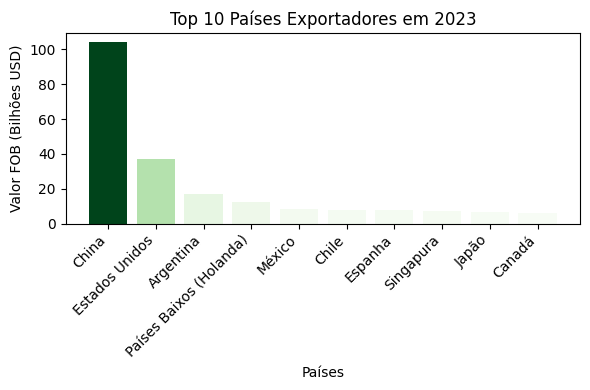

In [ ]:
#Plotar os 10 maiores exportadores do Brazil em 2023
# Plotar com o gráfico de barras vertical
plt.figure(figsize=(6,4))
norm = plt.Normalize(top_paises.min(), top_paises.max())
cmap = plt.get_cmap("Greens")
bars = plt.bar(top_paises.index, top_paises.values, color=[cmap(norm(val)) for val in top_paises.values])

# Adicionar título e rótulos aos eixos
plt.title('Top 10 Países Exportadores em 2023', fontsize=12)
plt.xlabel('Países', fontsize=10)
plt.ylabel('Valor FOB (Bilhões USD)', fontsize=10)

# Adicionar as labels ao eixo X e girando para melhor visualização
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de textos
plt.show()

In [ ]:
##Localizar os 5 maiores estados exportadores do Brazil em 2023
# Agrupar os dados por Países e somar os valores de exportação em 2023
top_estados = df.groupby('UF')['2023'].sum().sort_values(ascending=False).head(10)
print(top_estados)

UF
São Paulo            71.490254
Rio de Janeiro       46.740829
Minas Gerais         40.233198
Mato Grosso          32.188175
Paraná               25.278476
Rio Grande do Sul    22.307900
Pará                 22.284550
Goiás                13.968370
Santa Catarina       11.577617
Bahia                11.317187
Name: 2023, dtype: float64


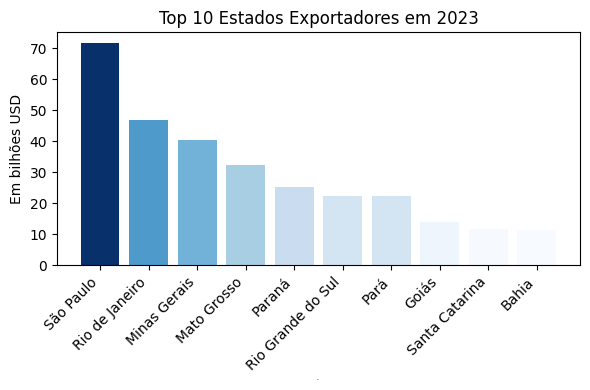

In [ ]:
#Plotar os 5 maiores exportadores do Brazil em 2023
# Plotar com o gráfico de barras vertical
plt.figure(figsize=(6,4))
norm = plt.Normalize(top_estados.min(), top_estados.max())
cmap = plt.get_cmap("Blues")
bars = plt.bar(top_estados.index, top_estados.values, color=[cmap(norm(val)) for val in top_estados.values])

# Adicionar título e rótulos aos eixos
plt.title('Top 10 Estados Exportadores em 2023', fontsize=12)
plt.xlabel('UFs', fontsize=0)
plt.ylabel('Em bilhões USD', fontsize=10)

# Adicionar as labels ao eixo X e girando para melhor visualização
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Ver estatísticas descritivas
descricao = df['2023'].describe()
print("Estatísticas Descritivas das Exportações:")
print(descricao)

Estatísticas Descritivas das Exportações:
count    3633.000000
mean        0.093503
std         0.658026
min         0.000000
25%         0.000138
50%         0.001643
75%         0.018508
max        18.160606
Name: 2023, dtype: float64


In [ ]:
#Cruzar duas fontes diferentes
df_pib = pd.read_excel('PIB.xlsx')
df_combinado = pd.merge(df, df_pib, on='Pais', how='inner')
print(df_combinado.head())

             Pais              UF       2023      PIB
0           China  Rio de Janeiro  18.160606   221376
1           China    Minas Gerais  16.142182   221376
2           China     Mato Grosso  13.201570   221376
3  Estados Unidos       São Paulo  12.513026  7457751
4           China            Pará  11.186158   221376


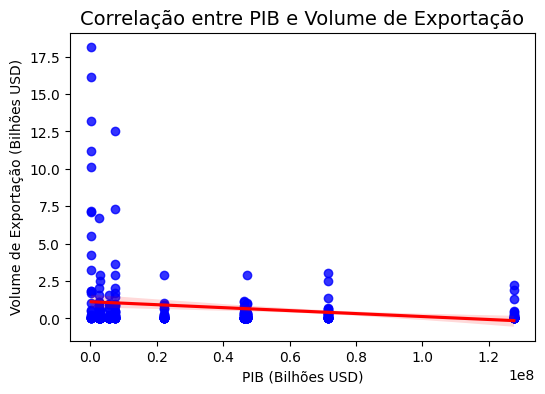

In [ ]:
#Analisar a correlação entre estados e volume de exportação
correlacao = df_combinado[['PIB', '2023']].corr()
plt.figure(figsize=(6, 4))
sns.regplot(x='PIB', y='2023', data=df_combinado, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Correlação entre PIB e Volume de Exportação', fontsize=14)
plt.xlabel('PIB (Bilhões USD)', fontsize=10)
plt.ylabel('Volume de Exportação (Bilhões USD)', fontsize=10)
plt.show()

In [ ]:
#Analisar a Regressão linear para prever exportações com base no ranking
dados = df_combinado[['PIB', '2023']]
slope, intercept, r_value, p_value, std_err = linregress(dados['PIB'], dados['2023'])
print(f"Coeficiente Angular (slope): {slope:.4f}")
print(f"Intercepto: {intercept:.4f}")
print(f"Coeficiente de Correlação (R²): {r_value**2:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("A relação entre o PIB e o volume de exportação é estatisticamente significativa.")
else:
    print("Não há evidências estatísticas suficientes para afirmar que o PIB influencia diretamente as exportações.")


Coeficiente Angular (slope): -0.0000
Intercepto: 1.1153
Coeficiente de Correlação (R²): 0.0288
Valor p: 0.0050
A relação entre o PIB e o volume de exportação é estatisticamente significativa.


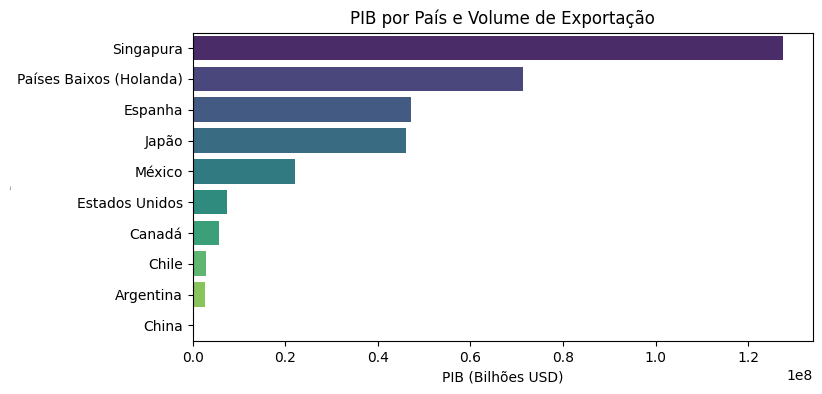

In [ ]:
#Representar resultado em gráfico de barras horizontais
df_combinado_sorted = df_combinado.sort_values('PIB', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='PIB', y='Pais', data=df_combinado_sorted, hue='Pais', palette='viridis', legend=False)
plt.title('PIB por País e Volume de Exportação', fontsize=12)
plt.xlabel('PIB (Bilhões USD)', fontsize=10)
plt.ylabel('Países', fontsize=0)
plt.show()